# Optuna Hyperparameter Optimization Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('./drive/MyDrive/266_project/project/')

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
import optuna
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from optuna.visualization.matplotlib import plot_contour, plot_edf, plot_slice, plot_timeline

In [ ]:
# Instantiate fpath
SUPPORT = './support/'

# Import study
with open(SUPPORT + 'optuna_study_CNNForWord2VecBERTweet.pkl', 'rb') as f:
    study = pickle.load(f)

<ipython-input-6-8300ad87c1cb>:5: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  axs = optuna.visualization.matplotlib.plot_contour(study, params=['epochs', 'optimizer', 'weight_decay', 'max_len', 'accumulation_steps', 'batch_size', 'learning_rate', 'dropout_rate'])
[W 2024-04-14 05:54:03,436] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.
<ipython-input-6-8300ad87c1cb>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=font_size)
<ipython-input-6-8300ad87c1cb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=font_size)


<Figure size 2000x3000 with 0 Axes>

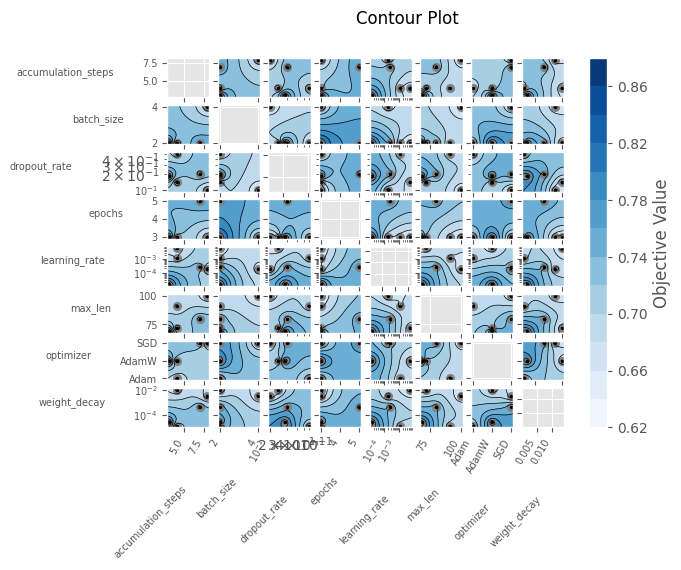

In [ ]:
# plot contour
font_size=7

plt.figure(figsize=(20,30))
axs = optuna.visualization.matplotlib.plot_contour(study, params=['epochs', 'optimizer', 'weight_decay', 'max_len', 'accumulation_steps', 'batch_size', 'learning_rate', 'dropout_rate'])

for i, ax_row in enumerate(axs):
  for j, ax in enumerate(ax_row):
    if ax is not None:
      for label in ax.get_xticklabels():
        ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right', fontsize=font_size)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=font_size)
      for label in ax.get_yticklabels():
        ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right', fontsize=font_size)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=font_size)
        label.set_rotation(0)
        label.set_size(font_size)

      # increase padding
      ax.xaxis.labelpad=20
      ax.yaxis.labelpad=20

      # Adjust font size
      ax.xaxis.label.set_size(font_size)
      ax.yaxis.label.set_size(font_size)
      ax.title.set_size(font_size)
# set xaxis label size
ax.xaxis.label.set_size(font_size)
# set yaxis label size
ax.yaxis.label.set_size(font_size)
# set title size
ax.title.set_size(font_size)

plt.show()




In [ ]:
study.best_params.keys()

dict_keys(['batch_size', 'learning_rate', 'epochs', 'dropout_rate', 'optimizer', 'weight_decay', 'max_len', 'unfreeze_epoch', 'accumulation_steps'])

<ipython-input-8-171a4acdeeb8>:1: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  plot_edf(study)


<Axes: title={'center': 'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

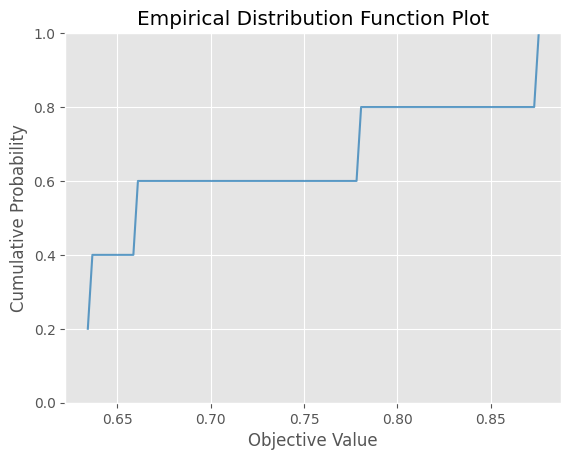

In [ ]:
plot_edf(study)

<ipython-input-9-6782d7756c5e>:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  plot_slice(study)


array([<Axes: xlabel='accumulation_steps', ylabel='Objective Value'>,
       <Axes: xlabel='batch_size'>, <Axes: xlabel='dropout_rate'>,
       <Axes: xlabel='epochs'>, <Axes: xlabel='learning_rate'>,
       <Axes: xlabel='max_len'>, <Axes: xlabel='optimizer'>,
       <Axes: xlabel='unfreeze_epoch'>, <Axes: xlabel='weight_decay'>],
      dtype=object)

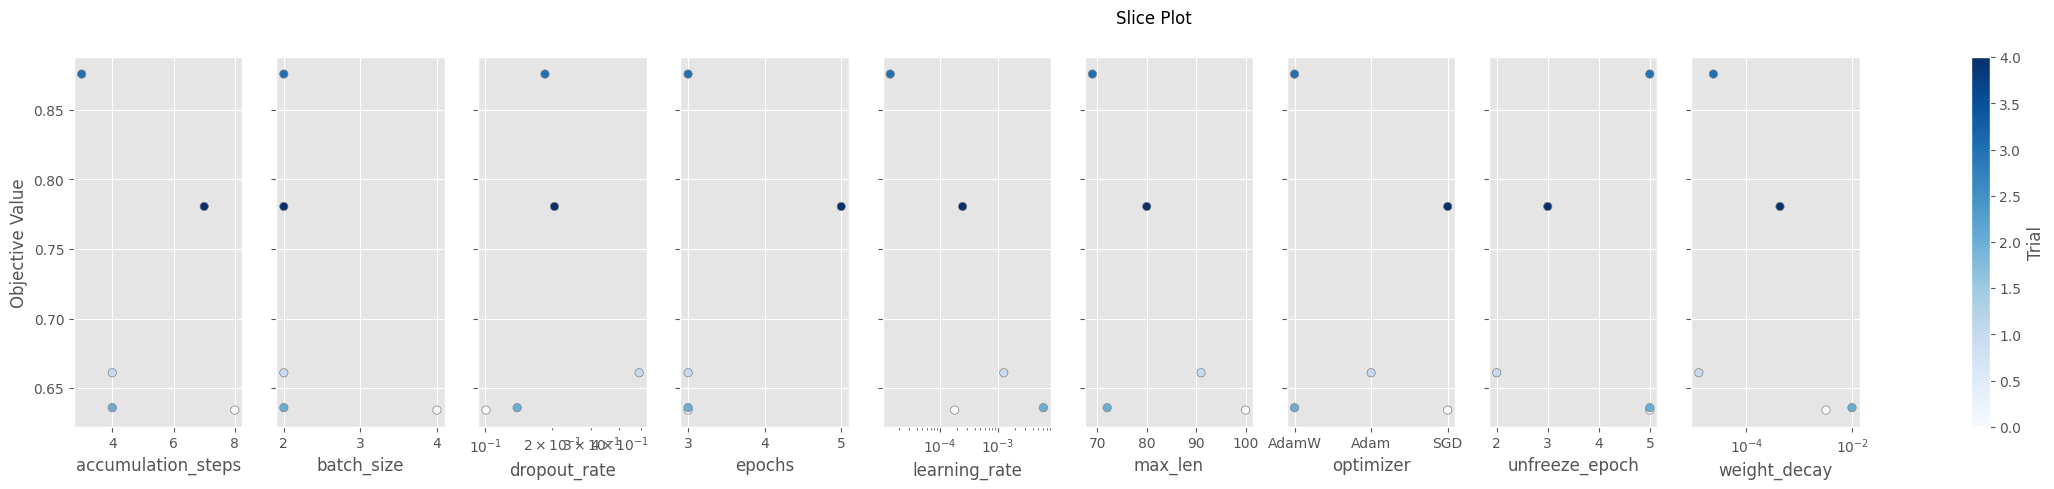

In [ ]:
plot_slice(study)

<ipython-input-10-868b8d13407b>:1: ExperimentalWarning: plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.
  plot_timeline(study)


<Axes: title={'center': 'Timeline Plot'}, xlabel='Datetime', ylabel='Trial'>

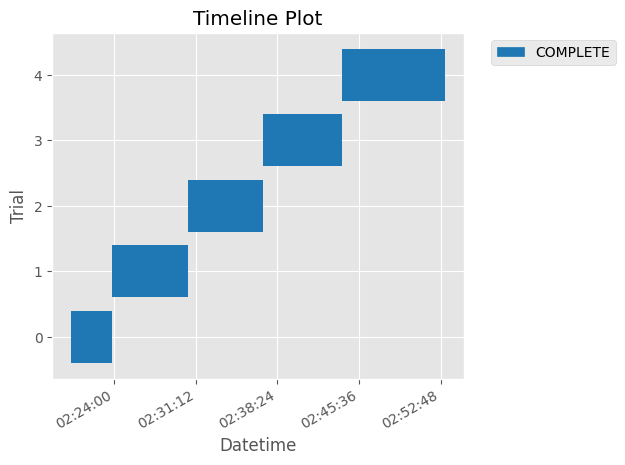

In [ ]:
plot_timeline(study)

In [ ]:
optuna.visualization.plot_param_importances(study)